In [4]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [5]:
import pandas as pd


data = pd.read_csv("Kor_income.csv")

#from google.colab import drive
#drive.mount('/content/drive')

#data = pd.read_csv("/content/drive/MyDrive/data/Kor_income.csv")
df = data.copy()
df

,Unnamed: 0,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,77530,68460101,2005,1.0,3.0,1.0,2.0,1940.0,2.0,2.0,1.0,617,1,,460.0
1,67016,59620101,2018,14.0,4.0,3.0,1.0,1939.0,5.0,1.0,2.0,,,9,1713.0
2,38931,35960101,2012,8.0,2.0,3.0,1.0,1967.0,6.0,3.0,1.0,510,1,,2854.0
3,72033,63870101,2011,7.0,4.0,5.0,1.0,1947.0,3.0,1.0,1.0,611,1,,4290.0
4,21862,20620101,2017,13.0,4.0,2.0,1.0,1940.0,2.0,1.0,2.0,,,10,1608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58777,63785,57030101,2012,8.0,7.0,2.0,1.0,1936.0,3.0,1.0,1.0,611,1,,1301.0
58778,54901,50040101,2017,13.0,5.0,2.0,2.0,1974.0,5.0,2.0,2.0,899,1,,1906.0
58779,33660,30940101,2015,11.0,5.0,4.0,1.0,1966.0,8.0,1.0,2.0,510,10,,15259.0
58780,66651,59300101,2013,9.0,7.0,2.0,1.0,1943.0,3.0,1.0,2.0,611,1,,1556.0


1. 수치형 컬럼으로 변환!

In [6]:
import copy
new_df = copy.deepcopy(df) # deepcopy 를 이용하여 원본 데이터의 손상을 막음
for col in new_df.columns:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

new_df.head(10)

,Unnamed: 0,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,77530,68460101,2005,1.0,3.0,1.0,2.0,1940.0,2.0,2.0,1.0,617.0,1.0,NaN,460.0
1,67016,59620101,2018,14.0,4.0,3.0,1.0,1939.0,5.0,1.0,2.0,NaN,NaN,9.0,1713.0
2,38931,35960101,2012,8.0,2.0,3.0,1.0,1967.0,6.0,3.0,1.0,510.0,1.0,NaN,2854.0
3,72033,63870101,2011,7.0,4.0,5.0,1.0,1947.0,3.0,1.0,1.0,611.0,1.0,NaN,4290.0
4,21862,20620101,2017,13.0,4.0,2.0,1.0,1940.0,2.0,1.0,2.0,NaN,NaN,10.0,1608.0
5,17575,16890101,2007,3.0,3.0,3.0,1.0,1937.0,4.0,1.0,1.0,912.0,3.0,NaN,1502.0
6,25998,24350101,2005,1.0,2.0,2.0,1.0,1940.0,5.0,1.0,2.0,NaN,NaN,NaN,1837.0
7,35131,32280101,2015,11.0,3.0,4.0,1.0,1975.0,7.0,1.0,2.0,235.0,10.0,NaN,8455.0
8,18518,17600101,2016,12.0,3.0,3.0,1.0,1967.0,7.0,5.0,2.0,NaN,NaN,NaN,1570.0
9,33507,30810101,2007,3.0,5.0,5.0,1.0,1968.0,5.0,1.0,2.0,811.0,3.0,NaN,4190.0


# 2. 관련없는 컬럼인 Unnamed: 0 삭제

In [7]:
new_df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [8]:
new_df

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,68460101,2005,1.0,3.0,1.0,2.0,1940.0,2.0,2.0,1.0,617.0,1.0,NaN,460.0
1,59620101,2018,14.0,4.0,3.0,1.0,1939.0,5.0,1.0,2.0,NaN,NaN,9.0,1713.0
2,35960101,2012,8.0,2.0,3.0,1.0,1967.0,6.0,3.0,1.0,510.0,1.0,NaN,2854.0
3,63870101,2011,7.0,4.0,5.0,1.0,1947.0,3.0,1.0,1.0,611.0,1.0,NaN,4290.0
4,20620101,2017,13.0,4.0,2.0,1.0,1940.0,2.0,1.0,2.0,NaN,NaN,10.0,1608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58777,57030101,2012,8.0,7.0,2.0,1.0,1936.0,3.0,1.0,1.0,611.0,1.0,NaN,1301.0
58778,50040101,2017,13.0,5.0,2.0,2.0,1974.0,5.0,2.0,2.0,899.0,1.0,NaN,1906.0
58779,30940101,2015,11.0,5.0,4.0,1.0,1966.0,8.0,1.0,2.0,510.0,10.0,NaN,15259.0
58780,59300101,2013,9.0,7.0,2.0,1.0,1943.0,3.0,1.0,2.0,611.0,1.0,NaN,1556.0


# 3. 이상치 삭제
- 삭제를 사용한 이유: 이상치들의 양이 전체 데이터의 약 0.1% 정도밖에 되지 않았기 때문에 이상치를 제거하는 것이 머신러닝의 정확도를 높여줄 것이라고 생각했음
- 다시 말해, 이상치가 있는 부분에서 특별한 의미를 찾기 힘들 것이라고 판단했음

In [9]:
new_df.describe()

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
count,5.878200e+04,58782.000000,58781.000000,58781.000000,58781.000000,58781.000000,58781.000000,58781.000000,58781.000000,58781.000000,37570.000000,37570.000000,20295.000000,58781.000000
mean,4.373323e+07,2011.498775,7.498767,3.686378,2.481397,1.295793,1952.942260,4.512887,1.683639,1.500281,616.454032,3.435986,8.730229,3443.816131
std,2.620853e+07,4.012878,4.012911,2.056051,1.290403,0.456402,16.026838,1.669266,1.107915,0.537648,308.521815,3.441601,5.187088,4477.863921
min,1.010100e+04,2005.000000,1.000000,1.000000,1.000000,1.000000,1910.000000,2.000000,0.000000,1.000000,12.000000,1.000000,0.000000,-232174.000000
25%,2.188010e+07,2008.000000,4.000000,2.000000,1.000000,1.000000,1939.000000,3.000000,1.000000,1.000000,412.000000,1.000000,8.000000,1133.000000
50%,4.331010e+07,2012.000000,8.000000,3.000000,2.000000,1.000000,1952.000000,5.000000,1.000000,1.000000,611.000000,2.000000,10.000000,2429.000000
75%,6.196010e+07,2015.000000,11.000000,5.000000,3.000000,2.000000,1966.000000,5.000000,2.000000,2.000000,873.000000,5.000000,10.000000,4690.000000
max,9.800070e+07,2018.000000,14.000000,7.000000,9.000000,2.000000,2002.000000,9.000000,9.000000,9.000000,9999.000000,99.000000,99.000000,468209.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x79df999d2da0>,
 'caps': [<matplotlib.lines.Line2D at 0x79df999d32e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79df999d2b00>],
 'medians': [<matplotlib.lines.Line2D at 0x79df999d3820>],
 'fliers': [<matplotlib.lines.Line2D at 0x79df999d3ac0>],
 'means': []}

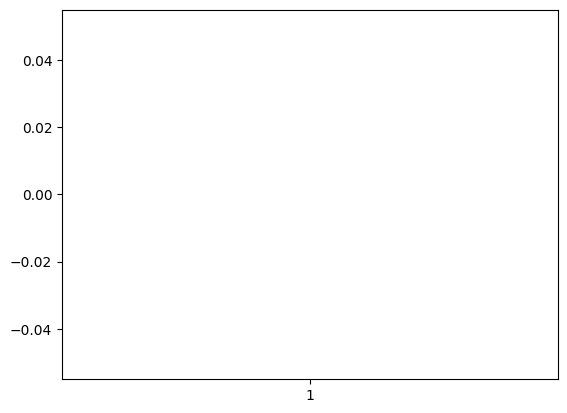

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(new_df['income'])

In [11]:
new_df[new_df['income'] < 0]
# income이 0 미만인 경우는 161가지

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
46,59280101,2012,8.0,7.0,3.0,1.0,1947.0,3.0,1.0,2.0,611.0,1.0,NaN,-1772.000000
198,5960101,2006,2.0,1.0,1.0,2.0,1933.0,2.0,2.0,2.0,NaN,NaN,4.0,-4365.707868
205,24140101,2006,2.0,2.0,2.0,1.0,1945.0,3.0,1.0,1.0,941.0,3.0,NaN,-218.811691
210,36500101,2008,4.0,5.0,4.0,1.0,1973.0,7.0,1.0,2.0,761.0,2.0,NaN,-7834.000000
253,49100101,2012,8.0,5.0,4.0,1.0,1965.0,5.0,1.0,1.0,151.0,1.0,NaN,-1328.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,5690101,2007,3.0,1.0,4.0,1.0,1964.0,7.0,1.0,2.0,NaN,NaN,NaN,-6078.000000
55447,7550101,2017,13.0,1.0,5.0,1.0,1974.0,6.0,1.0,1.0,772.0,1.0,NaN,-232174.000000
55601,60940101,2010,6.0,4.0,2.0,1.0,1951.0,3.0,1.0,2.0,613.0,1.0,NaN,-11438.000000
56338,69940101,2006,2.0,7.0,2.0,1.0,1932.0,3.0,1.0,2.0,612.0,1.0,NaN,-1927.000000


In [12]:
new_df.isna().sum()

id                        0
year                      0
wave                      1
region                    1
family_member             1
gender                    1
year_born                 1
education_level           1
marriage                  1
religion                  1
occupation            21212
company_size          21212
reason_none_worker    38487
income                    1
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x79df9992d210>,
 'caps': [<matplotlib.lines.Line2D at 0x79df9992d6c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79df9992d120>],
 'medians': [<matplotlib.lines.Line2D at 0x79df9992dc00>],
 'fliers': [<matplotlib.lines.Line2D at 0x79df9992dea0>],
 'means': []}

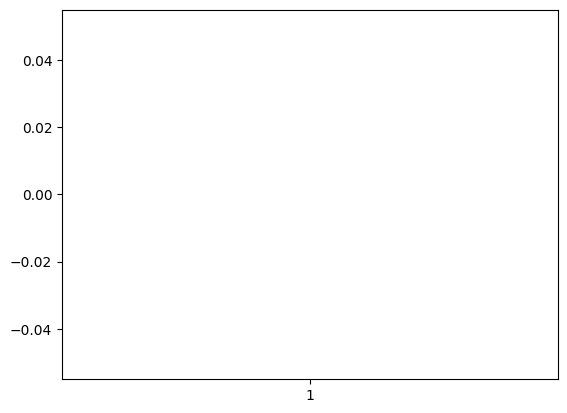

In [13]:
import matplotlib.pyplot as plt

plt.boxplot(new_df['religion'])

In [14]:
len(new_df[new_df['religion'] > 2])
# religion에서 이상치는 2개. 전부 9로 기록되어있음

41

{'whiskers': [<matplotlib.lines.Line2D at 0x79df999927d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79df99992bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79df99992530>],
 'medians': [<matplotlib.lines.Line2D at 0x79df99993130>],
 'fliers': [<matplotlib.lines.Line2D at 0x79df999933d0>],
 'means': []}

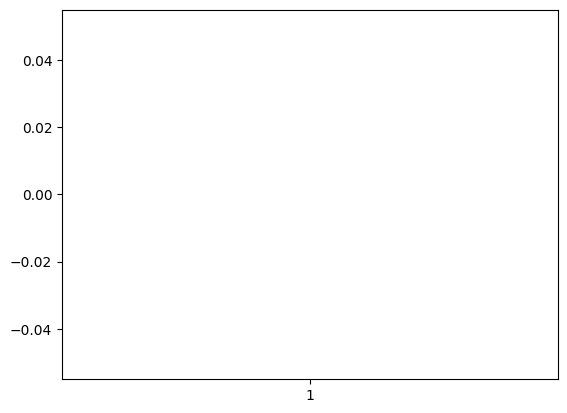

In [15]:
plt.boxplot(new_df['marriage'])
# 이 중에서 컬럼 설명서에서는 나올 수 없는 9를 제거할 이상치로 보자!

In [16]:
len(new_df[new_df['marriage']  == 9])
# marriage가 이상치인 경우는 7가지

6

In [17]:
# 그러면 이제 이상치가 있는 경우들을 삭제하자.
new_df = new_df[new_df['income'] >= 0]
new_df = new_df[new_df['religion'] <= 2]
new_df = new_df[new_df['marriage'] < 9]
new_df = new_df[new_df['marriage'] != 0]
new_df.drop(new_df[new_df['company_size'] == 99].index,inplace=True)


new_df

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,68460101,2005,1.0,3.0,1.0,2.0,1940.0,2.0,2.0,1.0,617.0,1.0,NaN,460.0
1,59620101,2018,14.0,4.0,3.0,1.0,1939.0,5.0,1.0,2.0,NaN,NaN,9.0,1713.0
2,35960101,2012,8.0,2.0,3.0,1.0,1967.0,6.0,3.0,1.0,510.0,1.0,NaN,2854.0
3,63870101,2011,7.0,4.0,5.0,1.0,1947.0,3.0,1.0,1.0,611.0,1.0,NaN,4290.0
4,20620101,2017,13.0,4.0,2.0,1.0,1940.0,2.0,1.0,2.0,NaN,NaN,10.0,1608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58776,63851101,2017,13.0,1.0,2.0,2.0,1994.0,7.0,5.0,2.0,441.0,2.0,NaN,4973.0
58777,57030101,2012,8.0,7.0,2.0,1.0,1936.0,3.0,1.0,1.0,611.0,1.0,NaN,1301.0
58778,50040101,2017,13.0,5.0,2.0,2.0,1974.0,5.0,2.0,2.0,899.0,1.0,NaN,1906.0
58779,30940101,2015,11.0,5.0,4.0,1.0,1966.0,8.0,1.0,2.0,510.0,10.0,NaN,15259.0


In [18]:
new_df.to_csv('new_df.csv')

In [19]:
#reason_none_worker가 na면서 occupation이 na거나 company_size가 na인 값들을 제거함!
# ->돈을 벌지 않으면서 나머지 두 값 중 하나가 na라면 직업이 없고, 돈을 벌지 않는 상태라고 판단

new_df[new_df['reason_none_worker'].isna() & new_df['occupation'].isna()].dropna()
new_df[new_df['reason_none_worker'].isna() & new_df['company_size'].isna()].dropna()
new_df

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,68460101,2005,1.0,3.0,1.0,2.0,1940.0,2.0,2.0,1.0,617.0,1.0,NaN,460.0
1,59620101,2018,14.0,4.0,3.0,1.0,1939.0,5.0,1.0,2.0,NaN,NaN,9.0,1713.0
2,35960101,2012,8.0,2.0,3.0,1.0,1967.0,6.0,3.0,1.0,510.0,1.0,NaN,2854.0
3,63870101,2011,7.0,4.0,5.0,1.0,1947.0,3.0,1.0,1.0,611.0,1.0,NaN,4290.0
4,20620101,2017,13.0,4.0,2.0,1.0,1940.0,2.0,1.0,2.0,NaN,NaN,10.0,1608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58776,63851101,2017,13.0,1.0,2.0,2.0,1994.0,7.0,5.0,2.0,441.0,2.0,NaN,4973.0
58777,57030101,2012,8.0,7.0,2.0,1.0,1936.0,3.0,1.0,1.0,611.0,1.0,NaN,1301.0
58778,50040101,2017,13.0,5.0,2.0,2.0,1974.0,5.0,2.0,2.0,899.0,1.0,NaN,1906.0
58779,30940101,2015,11.0,5.0,4.0,1.0,1966.0,8.0,1.0,2.0,510.0,10.0,NaN,15259.0


In [20]:
new_df[new_df['reason_none_worker'].isna()] = new_df[new_df['reason_none_worker'].isna()].fillna(0)
new_df[new_df['company_size'].isna()] = new_df[new_df['company_size'].isna()].fillna(0)
new_df[new_df['occupation'].isna()] = new_df[new_df['occupation'].isna()].fillna(0)
new_df

#앞서 언급한 경우를 제외하고 남아있는 Nan값을 0으로 설정

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,68460101,2005,1.0,3.0,1.0,2.0,1940.0,2.0,2.0,1.0,617.0,1.0,0.0,460.0
1,59620101,2018,14.0,4.0,3.0,1.0,1939.0,5.0,1.0,2.0,0.0,0.0,9.0,1713.0
2,35960101,2012,8.0,2.0,3.0,1.0,1967.0,6.0,3.0,1.0,510.0,1.0,0.0,2854.0
3,63870101,2011,7.0,4.0,5.0,1.0,1947.0,3.0,1.0,1.0,611.0,1.0,0.0,4290.0
4,20620101,2017,13.0,4.0,2.0,1.0,1940.0,2.0,1.0,2.0,0.0,0.0,10.0,1608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58776,63851101,2017,13.0,1.0,2.0,2.0,1994.0,7.0,5.0,2.0,441.0,2.0,0.0,4973.0
58777,57030101,2012,8.0,7.0,2.0,1.0,1936.0,3.0,1.0,1.0,611.0,1.0,0.0,1301.0
58778,50040101,2017,13.0,5.0,2.0,2.0,1974.0,5.0,2.0,2.0,899.0,1.0,0.0,1906.0
58779,30940101,2015,11.0,5.0,4.0,1.0,1966.0,8.0,1.0,2.0,510.0,10.0,0.0,15259.0


In [21]:
#age 변수 추가
new_df['age'] = new_df['year'] - new_df['year_born'] + 1

In [22]:
# age에 year과 yearborn을 이용하여 새로운 정보를 뽑아내었으니
# yearborn 컬럼 삭제 (year은 추후 물가 반영에 사용 예정)
# year과 wave는 동일하니 wave 역시 삭제
new_df.drop(columns={"year_born","wave"}, inplace=True)

In [23]:
new_df.drop(new_df[(new_df['age'] < 18) & (new_df['marriage'] == 2)].index, inplace=True)

new_df

,id,year,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
0,68460101,2005,3.0,1.0,2.0,2.0,2.0,1.0,617.0,1.0,0.0,460.0,66.0
1,59620101,2018,4.0,3.0,1.0,5.0,1.0,2.0,0.0,0.0,9.0,1713.0,80.0
2,35960101,2012,2.0,3.0,1.0,6.0,3.0,1.0,510.0,1.0,0.0,2854.0,46.0
3,63870101,2011,4.0,5.0,1.0,3.0,1.0,1.0,611.0,1.0,0.0,4290.0,65.0
4,20620101,2017,4.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,10.0,1608.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58776,63851101,2017,1.0,2.0,2.0,7.0,5.0,2.0,441.0,2.0,0.0,4973.0,24.0
58777,57030101,2012,7.0,2.0,1.0,3.0,1.0,1.0,611.0,1.0,0.0,1301.0,77.0
58778,50040101,2017,5.0,2.0,2.0,5.0,2.0,2.0,899.0,1.0,0.0,1906.0,44.0
58779,30940101,2015,5.0,4.0,1.0,8.0,1.0,2.0,510.0,10.0,0.0,15259.0,50.0


In [24]:
new_df.corr()

,id,year,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
id,1.000000,0.207188,0.400498,-0.132932,0.073086,-0.174868,0.012183,0.008451,-0.007599,-0.075301,0.052391,-0.081249,0.159169
year,0.207188,1.000000,0.057027,-0.098875,0.071359,0.011856,0.034298,0.023270,-0.037512,-0.016916,0.117596,0.122483,0.171557
region,0.400498,0.057027,1.000000,-0.073069,0.047206,-0.162245,-0.031513,0.045697,-0.000411,-0.057364,0.027431,-0.092201,0.120057
family_member,-0.132932,-0.098875,-0.073069,1.000000,-0.491902,0.417119,-0.444377,0.058957,0.272686,0.320824,-0.339875,0.406635,-0.472417
gender,0.073086,0.071359,0.047206,-0.491902,1.000000,-0.420966,0.395716,-0.146597,-0.233993,-0.240759,0.267785,-0.270134,0.291645
education_level,-0.174868,0.011856,-0.162245,0.417119,-0.420966,1.000000,-0.043891,0.047489,0.096449,0.455061,-0.296421,0.391193,-0.627248
marriage,0.012183,0.034298,-0.031513,-0.444377,0.395716,-0.043891,1.000000,0.039146,-0.075669,-0.055109,0.076315,-0.185847,-0.140035
religion,0.008451,0.023270,0.045697,0.058957,-0.146597,0.047489,0.039146,1.000000,0.071151,0.073569,-0.075718,0.030206,-0.148342
occupation,-0.007599,-0.037512,-0.000411,0.272686,-0.233993,0.096449,-0.075669,0.071151,1.000000,0.327527,-0.599884,0.129258,-0.309050
company_size,-0.075301,-0.016916,-0.057364,0.320824,-0.240759,0.455061,-0.055109,0.073569,0.327527,1.000000,-0.420367,0.339056,-0.505816


<Axes: >

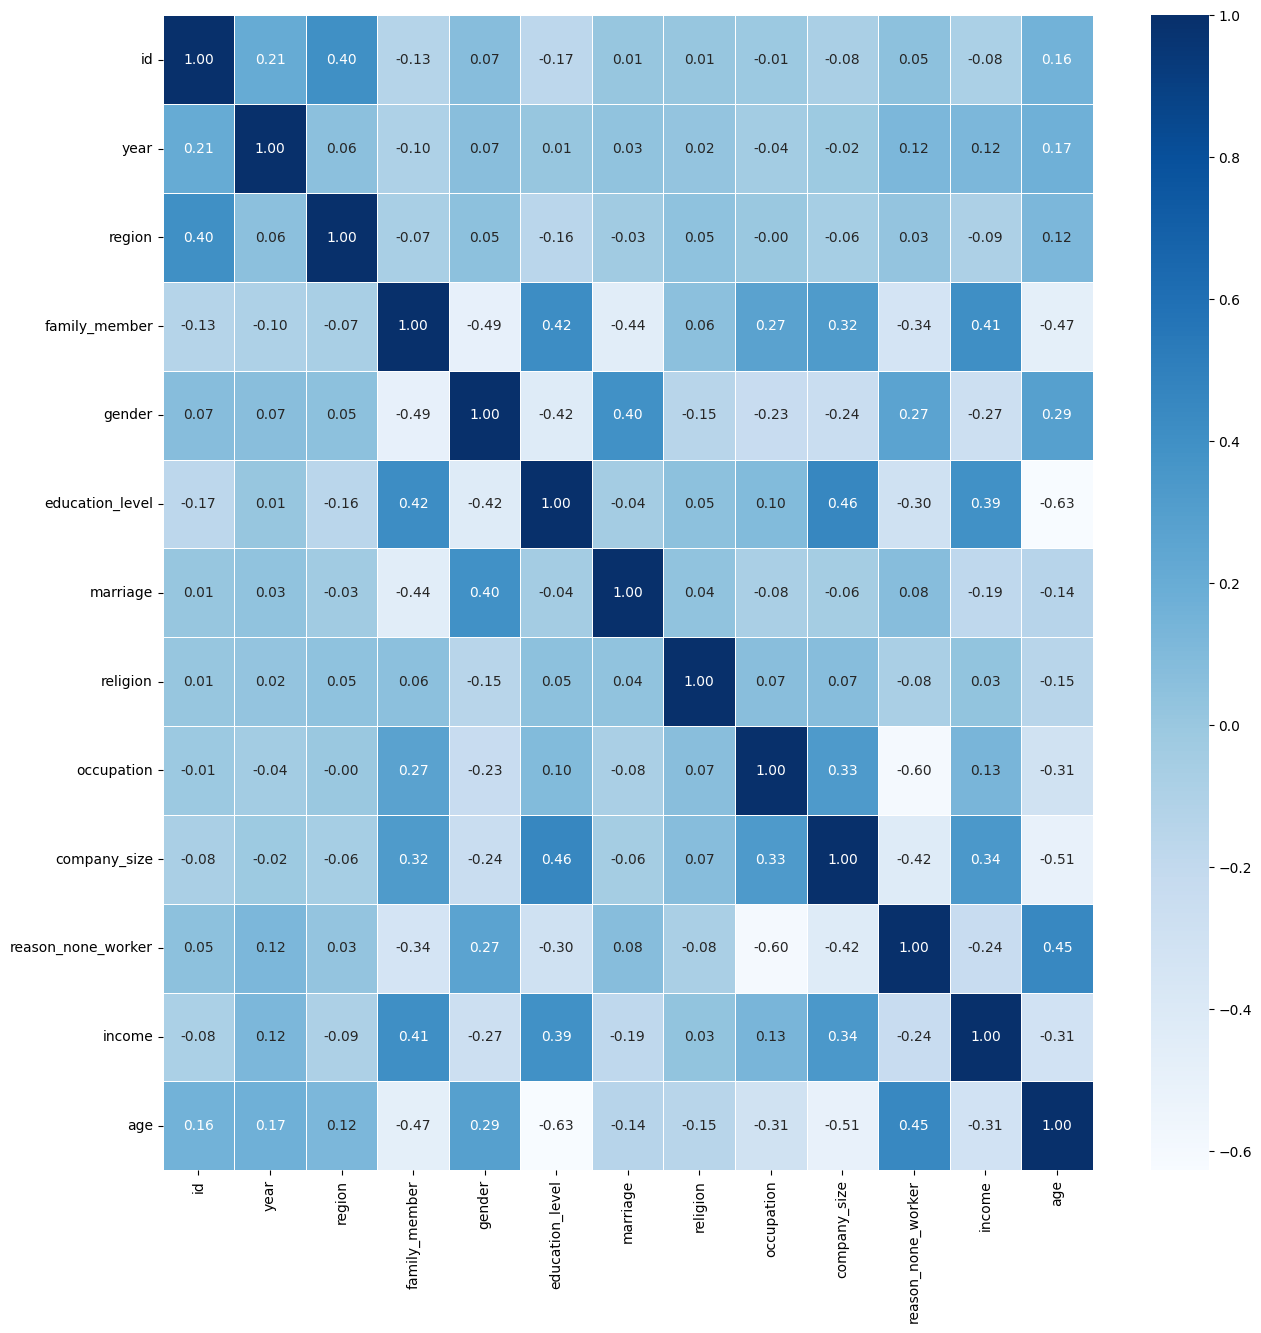

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = new_df.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

#income과의 상관계수의 절댓값이 0.2 이상인 변수들을 주요 변수들로 보고 분석
# -> family_member, gender, education_level, company_size, reason_none_worker, age9

In [26]:
# 머신에서 좀 더 정확하게 하기 위해 income을 기준으로 오름차순 정렬했음
new_df = new_df.sort_values(by='income')
new_df

,id,year,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
15436,23880101,2006,2.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,7.0,0.0,63.0
37274,23880101,2007,2.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,7.0,0.0,64.0
34429,10660101,2006,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,7.0,0.0,45.0
15187,41800101,2005,2.0,4.0,1.0,7.0,1.0,1.0,0.0,0.0,8.0,0.0,56.0
34415,15700101,2005,3.0,3.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49341,82681201,2017,2.0,2.0,1.0,7.0,1.0,1.0,151.0,1.0,0.0,124327.0,37.0
16331,30610101,2018,5.0,4.0,1.0,7.0,1.0,1.0,159.0,3.0,0.0,170204.0,50.0
30020,26300101,2014,2.0,3.0,1.0,7.0,1.0,1.0,153.0,3.0,0.0,245758.0,51.0
31247,39430101,2010,2.0,4.0,1.0,7.0,1.0,2.0,510.0,2.0,0.0,290062.0,45.0


In [27]:
new_df.isna().sum()

id                    0
year                  0
region                0
family_member         0
gender                0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
income                0
age                   0
dtype: int64

### 추후 계획

- 1. 스케일러는 Robust Scaler를 사용할 예정: 나올 수 없는 이상치 외에는 크게 전처리를 하지 않았기에 이상치에 영향을 덜 받는 스케일러 중 하나인 Robust를 사용할 것임

- 2. 물가 반영률을 이용하여 income을 재조정 할 예정: 좀 더 정확한 예측 및 좀 더 많은 의미를 뽑아내기 위함. 아마 year를 뺄 수 있을 것이라고 판단됨.

- 3. 머신러닝에서 머신은 xgboost 를 사용할 예정: NA값을 0으로 처리한 케이스가 많아 xgboost를 사용하는 것이 적합해보임

In [28]:
def replace_0_1(x):
    if int(x) == 0:
        x = 1
        return x
    else:
        return x
numeric_cols = ["income", "age", "family_member","company_size"]
for x in numeric_cols:
    new_df[x] = new_df[x].apply(replace_0_1)

In [29]:
def log_transform(x):
    import numpy as np
    if x == 0:
        return x
    else:
        x = np.log(x)
        return x

numeric_cols = ["income", "age", "family_member","company_size"]
for x in numeric_cols:
    new_df[x] = new_df[x].apply(log_transform)

<Axes: >

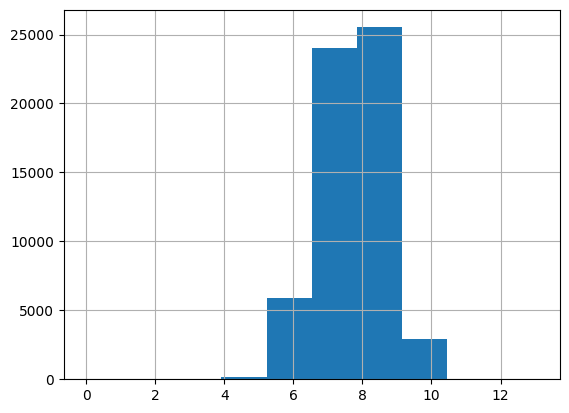

In [30]:
new_df['income'].hist()

In [31]:
#region encoding

def major_city(x):
    if x < 3:
        x = 1
        return x
    else:
        x = 0
        return x

new_df['major_city_enc'] = new_df['region'].apply(major_city)
new_df[['region', 'major_city_enc']]

,region,major_city_enc
15436,2.0,1
37274,2.0,1
34429,1.0,1
15187,2.0,1
34415,3.0,0
...,...,...
49341,2.0,1
16331,5.0,0
30020,2.0,1
31247,2.0,1


In [32]:
#marriage encoding (1 : couple, 0 : single)
def is_married(x):
    if(x == 2):
        return 1
    else:
        return 0

new_df['new_marriage'] = new_df['marriage'].apply(is_married)
new_df[['marriage', 'new_marriage']]

,marriage,new_marriage
15436,2.0,1
37274,2.0,1
34429,3.0,0
15187,1.0,0
34415,1.0,0
...,...,...
49341,1.0,0
16331,1.0,0
30020,1.0,0
31247,1.0,0


In [33]:
#Company_size encoding(0, 1, others)
def compSize_0(x):
    if (x == 0):
        return 1
    else:
        return 0

def compSize_1(x):
    if(x == 1):
        return 1
    else:
        return 0

def compSize_else(x):
    if(x > 1):
        return 1
    else:
        return 0

new_df['compSize_0'] = new_df['company_size'].apply(compSize_0)
new_df['compSize_1'] = new_df['company_size'].apply(compSize_1)
new_df['compSize_else'] = new_df['company_size'].apply(compSize_else)

new_df[['company_size', 'compSize_0','compSize_1', 'compSize_else']]

,company_size,compSize_0,compSize_1,compSize_else
15436,0.000000,1,0,0
37274,0.000000,1,0,0
34429,0.000000,1,0,0
15187,0.000000,1,0,0
34415,0.000000,1,0,0
...,...,...,...,...
49341,0.000000,1,0,0
16331,1.098612,0,0,1
30020,1.098612,0,0,1
31247,0.693147,0,0,0


In [34]:
#Occupation encoding( )
def Manager(x):
    if (x//100 == 1):
        return 1
    else:
        return 0

def Expert(x):
    if(x//100 == 2):
        return 1
    else:
        return 0

def Office(x):
    if(x//100 == 3):
        return 1
    else:
        return 0

def Service(x):
    if(x//100 == 4):
        return 1
    else:
        return 0

def Sale(x):
    if(x//100 == 5):
        return 1
    else:
        return 0

def Skilled(x):
    if(x//100 == 6):
        return 1
    else:
        return 0

def Func(x):
    if(x//100  == 7):
        return 1
    else:
        return 0

def Operation(x):
    if(x//100 == 8):
        return 1
    else:
        return 0

def SimLabor(x):
    if(x//100 == 9):
        return 1
    else:
        return 0

def others(x):
    if(x//100 == 0 or x//100 >=10):
        return 1
    else:
        return 0

new_df['Manager'] = new_df['occupation'].apply(Manager)
new_df['Expert'] = new_df['occupation'].apply(Expert)
new_df['Office'] = new_df['occupation'].apply(Office)
new_df['Service'] = new_df['occupation'].apply(Service)
new_df['Sale'] = new_df['occupation'].apply(Sale)
new_df['Skilled'] = new_df['occupation'].apply(Skilled)
new_df['Func'] = new_df['occupation'].apply(Func)
new_df['Operation'] = new_df['occupation'].apply(Operation)
new_df['SimLabor'] = new_df['occupation'].apply(SimLabor)
new_df['others'] = new_df['occupation'].apply(others)


new_df[['occupation','Manager', 'Expert', 'Office','Service','Sale','Skilled','Func','Operation','SimLabor','others']]

,occupation,Manager,Expert,Office,Service,Sale,Skilled,Func,Operation,SimLabor,others
15436,0.0,0,0,0,0,0,0,0,0,0,1
37274,0.0,0,0,0,0,0,0,0,0,0,1
34429,0.0,0,0,0,0,0,0,0,0,0,1
15187,0.0,0,0,0,0,0,0,0,0,0,1
34415,0.0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49341,151.0,1,0,0,0,0,0,0,0,0,0
16331,159.0,1,0,0,0,0,0,0,0,0,0
30020,153.0,1,0,0,0,0,0,0,0,0,0
31247,510.0,0,0,0,0,1,0,0,0,0,0


In [35]:
#gender encoding
def is_male(x):
    if(x == 1):
        return 1
    else:
        return 0

#기존 컬럼에 대체(남자면 1)
new_df['gender'] = new_df['gender'].apply(is_male)

In [36]:
#reason_none_worker encoding(1 : not worker, 0: worker)
def not_working(x):
    if (x != 0): #실업자면 1, 취직자면 0
        return 1
    else:
        return 0


#기존 컬럼에 대체(실업자면 1)
new_df['reason_none_worker'] = new_df['reason_none_worker'].apply(not_working)
new_df['reason_none_worker']

15436    1
37274    1
34429    1
15187    1
34415    0
        ..
49341    0
16331    0
30020    0
31247    0
20679    1
Name: reason_none_worker, Length: 58599, dtype: int64

In [37]:
new_df.to_csv('new_df.csv')

In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



x = new_df.drop(columns=['income', 'occupation', 'marriage', 'region', 'company_size']) #독립변수
y = new_df['income'] #종속변수

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

rf_model = RandomForestRegressor(random_state = 42)

#그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2,5,10]
}

# 그리드 서치 수행

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Best parameters : ", grid_search.best_params_)
print(f"RMSE : {rmse}")


In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#income과의 상관계수의 절댓값이 0.2 이상인 변수들을 주요 변수들로 보고 분석
# -> family_member, gender, education_level, company_size, reason_none_worker, age9


x = new_df[['family_member', 'gender', 'education_level', 'company_size', 'reason_none_worker', 'age']] #독립변수
y = new_df['income'] #종속변수

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

rf_model = RandomForestRegressor(random_state = 42)

#그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2,5,10]
}

# 그리드 서치 수행

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Best parameters : ", grid_search.best_params_)
print(f"RMSE : {rmse}")